In [1]:
import numpy as np
import numpy.linalg as lg
from scipy import io
import matplotlib.pyplot as pl
%matplotlib inline


[ 3.98926528  5.00280585] [ 1.16126017  1.01312201]


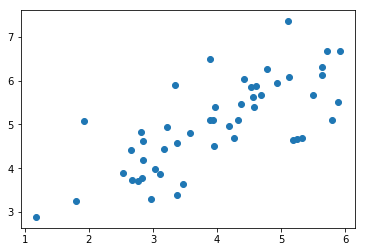

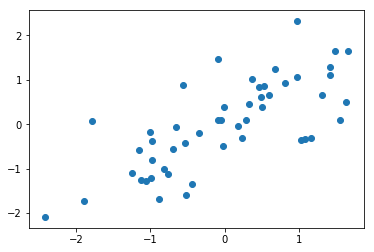

In [2]:
data = io.loadmat('ex7data1.mat')
X = data['X']
pl.scatter(X[:,0], X[:,1])
xmean = np.mean(X,axis=0)
xstd = np.std(X, axis=0)
Xnorm = (X - xmean)/xstd
pl.figure()

pl.scatter(Xnorm[:,0], Xnorm[:,1])
print(xmean, xstd)

-0.707106781187 -0.707106781187


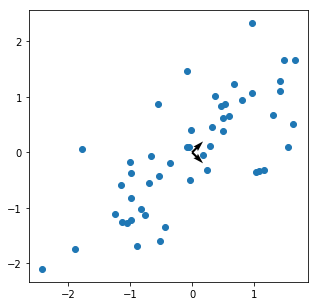

In [3]:
# computing the covariance matrix
m = Xnorm.shape[0]
sigma = (1./m) * Xnorm.T.dot(Xnorm)
U, S, V = lg.svd(sigma)
pl.figure(figsize=(5,5))
pl.scatter(Xnorm[:,0], Xnorm[:,1])
pl.quiver([0,0], [0,0], [1,1], [-1,1])
#plt.xlim(-10, 10)
# draw eigenvectors
print(U[0,0], U[1,0])


In [4]:
def projectData(X, U, K):
    """projects data point into top K components of U"""
    m = X.shape[0]
    Xproject = np.zeros((X.shape[0],K), dtype=float)
    Xproject = X.dot(U[:,0:K])
    return Xproject    

In [5]:
K=1
Xprojected = projectData(Xnorm,U, K)

In [6]:
def recoverData(Xprojected, U, K):
    """compute approximate recovered data"""
    Xrec = Xprojected.dot(U[:,0:K].T)
    return Xrec

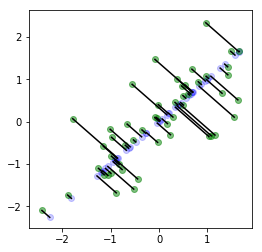

In [7]:
def plotline(x1,x2):
    p1 = np.array([x1[0], x2[0]])
    p2 = np.array([x1[1], x2[1]])
    pl.plot(p1,p2, '-k')
    return True

Xrec = recoverData(Xprojected, U, K)
#print(Xrec)
pl.figure(figsize=(4,4))
pl.scatter(Xrec[:,0], Xrec[:,1], c='b', alpha=0.2)
pl.scatter(Xnorm[:,0], Xnorm[:,1], c='g', alpha=0.5)
for i in range(Xnorm.shape[0]):
    plotline(Xnorm[i,:], Xrec[i,:])

In [8]:
dataImg = io.loadmat('ex7faces.mat')

In [26]:
Ximg = dataImg['X']
Ximg.shape

(5000, 1024)

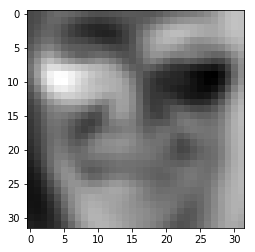

In [25]:
XtoDisp = Ximg.reshape(Ximg.shape[0], 32, 32)
pl.imshow(XtoDisp[2].T)
xmean = np.mean(Ximg, axis=0)
xstd = np.std(Ximg, axis=0)
Ximg = (Ximg-xmean)/xstd
m = Ximg.shape[0]
sigma = (1./m) * Ximg.T.dot(Ximg)
U, S, V = lg.svd(sigma)
UtoDis = U.reshape(32,32,1024)
pl.imshow(UtoDis[:,:,6].T, cmap='gray')
